In [1]:
from markethistory import MarketHistory
from constants import * 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from supervised import *
import pandas as pd
import json
from backtest import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
with open('config.json') as file:
    config = json.load(file)

Example

In [4]:
markethistory = MarketHistory(config)

In [7]:
markethistory.features

['close', 'high', 'low', 'volume', 'ma10', 'ma50', 'ma100', 'ma200', 'std']

### Best set of hyperparameters so far

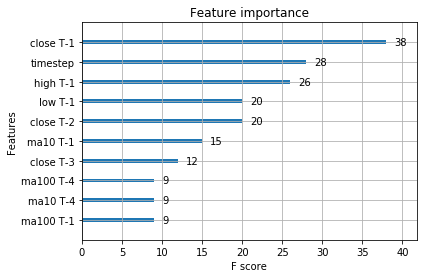

In [134]:
agent.models['SC'].plot_importance()

In [71]:
features = {'close':0,'high':1,'low':2,'volume':3,'ma10':4,'ma100':6,'ma200':7,'std':8}
params = {'max_depth':6, 'eta':.1, 'silent':1,'alpha':0,'min_child_weight':0,'subsample':1, 'objective':"binary:logistic" }
agent = Agent(markethistory,features,num_rounds=10,params=params,thres_val=.4)

                    BCH    DGB    ETC    ETH    LTC     SC    STR    XEM  \
Training error    0.383  0.327  0.376  0.385  0.386  0.260  0.390  0.378   
Validation error  0.400  0.319  0.452  0.420  0.442  0.295  0.429  0.435   

                    XMR    XRP  reversed_USDT  
Training error    0.376  0.397          0.410  
Validation error  0.429  0.459          0.483  


/Users/Nathan/Desktop/cs194/project/cryptoprofit/deepm/supervised.py:168: RuntimeWarning: divide by zero encountered in true_divide
  else:
/Users/Nathan/Desktop/cs194/project/cryptoprofit/deepm/supervised.py:168: RuntimeWarning: invalid value encountered in true_divide
  else:


In [76]:
agent.select_traders(thres_val=.4)

In [77]:
agent.traders

{'BCH': <supervised.BoostedTreeModel at 0x114d2bc88>,
 'DGB': <supervised.BoostedTreeModel at 0x114d2b9e8>,
 'SC': <supervised.BoostedTreeModel at 0x114d2b2b0>}

In [78]:
config['backtest']['coins'] = markethistory.traded_coins
bt = Backtest(agent,config)

Getting backtest results for train data...
include_fees
Getting backtest results for test data...
include_fees
       Final portfolio value  Average return    Sharpe
Test               -0.000055    5.589404e-01 -0.019818
Train               0.001024    2.413886e+20  0.201284
Number of trades per asset: 
{'BCH': 4785, 'DGB': 4988, 'ETC': 0, 'ETH': 0, 'LTC': 0, 'SC': 4594, 'STR': 0, 'XEM': 0, 'XMR': 0, 'XRP': 0, 'reversed_USDT': 0}


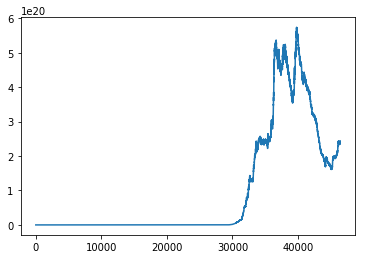

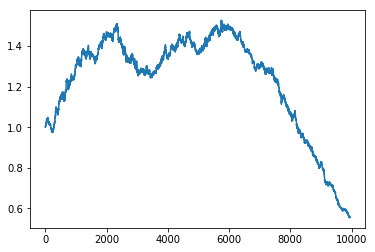

In [79]:
bt.plot_performance()

### Original Model

In [181]:
with open('config.json') as file:
    config_og = json.load(file)
config_og['market_history']['sampling_frequency'] = 1800

In [184]:
features = {'close':0,'high':1,'low':2}
mh = MarketHistory(config_og)

In [255]:
params = {'max_depth':5, 'eta':.25, 'silent':1,'alpha':0,'min_child_weight':0,'subsample':1, 'objective':"binary:logistic" }
agent = Agent(mh,features,num_rounds=10,params=params,thres_val=.51,normalization="divide")

                    BCH    DGB    ETC    ETH    LTC     SC    STR    XEM  \
Training error    0.392  0.412  0.386  0.395  0.394  0.417  0.386  0.412   
Validation error  0.546  0.475  0.492  0.524  0.473  0.508  0.491  0.541   

                    XMR    XRP  reversed_USDT  
Training error    0.386  0.401          0.389  
Validation error  0.487  0.517          0.518  


In [263]:
config_og['backtest']['include_fees'] = False

In [264]:
bt = Backtest(agent,config_og)

Getting backtest results for train data...
Getting backtest results for test data...
       Final portfolio value  Average return    Sharpe
Test                0.000032        1.044971  0.010404
Train               0.000654      123.569230  0.098825
Number of trades per asset: 
{'BCH': 0, 'DASH': 55, 'DGB': 0, 'ETC': 0, 'ETH': 137, 'FCT': 0, 'GNT': 27, 'LTC': 0, 'SC': 25, 'STR': 0, 'XEM': 0}


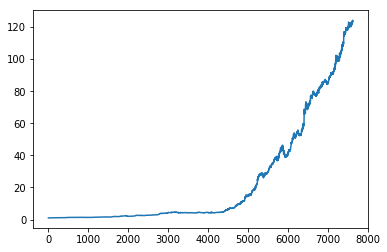

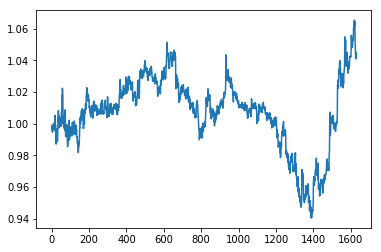

In [265]:
bt.plot_performance()